# Homework 2

### Due: Friday Sep 27, at 11:59pm via Brightspace


A car dealership wants to understand their customers and their buying habbits. The data (`cardealership.csv`) represents a randsome sample of their sales. 

|**VARIABLE**|**DESCRIPTION**|
|------------|---------------|
| **Gender** | gender for customer |
| **marital status** | is the customer 'Married' or 'Single'? |
| **age** | age of the customer |
| **country** | country make of the car |
| **size** |  the size of the car they bought ('Small', 'Medium', 'Large') |
| **type** | the type of the car they bought ('Family', 'Sporty', 'work') |

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

cardealership = pd.read_csv('cardealership.csv')
cardealership.head()

,Gender,marital status,age,country,size,type
0,Male,Married,34,American,Large,Family
1,Male,Single,36,Japanese,Small,Sporty
2,Male,Married,23,Japanese,Small,Family
3,Male,Single,29,American,Large,Family
4,Male,Married,39,American,Medium,Family


1. (1 point) Select all the married customers in the given dataset, and save it in a variable (`married_customers`). What is the percentage of married customers in the sample?

In [3]:
married_customers = cardealership[cardealership['marital status'] == 'Married']

marital_status_freq = cardealership['marital status'].value_counts(normalize=True) * 100
marital_status_freq.name = 'marital status'
marital_status_freq

marital status
Married    64.686469
Single     35.313531
Name: marital status, dtype: float64

2. (1 point) Use a list comprehension to create a list with two age categories. The category is `Below or equal to 30` if `age <= 30`, otherwise the category is `Above 30`. Use the result from this question to compute the number of customers in each category.

In [5]:
age_categories = ['Below 30' if age <= 30 else 'Above 30' for age in cardealership['age']]

age_category_counts = pd.Series(age_categories).value_counts()
age_category_counts.name = 'age'
print(age_category_counts)

Below 30    159
Above 30    144
Name: age, dtype: int64


3. (2 points) The current version of `Pandas` has 142 methods including (`DataFrame()`, `Series()`, `value_counts()`, etc.). In this question, you are expected to learn about the `cut()` method which allows you to categorize a numerical vector into user-defined categories. [Click here](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) to learn more about the `cut` method.

    - Use the `cut()` method to categorize the `age` variable into three buckets: `(0,30]`, `(30, 34]`, and `(34,60]`. (For this exercise, you don't have to add the new column to the original dataframe. You can save it in a seperate variable instead)
    - Rename the labels of the buckets to the ones shown in the table below.  
    - How many element are there in each category? 



<center> 

|bucket | label |
|-------|-------|
|(0,30] | Below 30 | 
|(30, 34]| Between 30 and 34|
|(34,60]| Above 34|

<center>

In [7]:
age_bins = pd.cut(cardealership['age'], bins=[0, 30, 34, 60], labels=['Below 30', 'Between 30 and 34', 'Above 34'])

age_bin_counts = age_bins.value_counts()
age_bin_counts.name = 'age'
age_bin_counts

age
Below 30             159
Above 34              76
Between 30 and 34     68
Name: age, dtype: int64

4. (1 point) `Pandas` has another method called `qcut`, which allows you to categorize a numerical variable into equal-sized buckets based on quantiles. Use the `qcut()` method to categorize `age` into quartiles (4 buckets). [Click here](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to learn more about the `cut` method

In [9]:
age_quartiles = pd.qcut(cardealership['age'], q=4)

age_quartile_counts = age_quartiles.value_counts()
age_quartile_counts.name = 'age'
age_quartile_counts

age
(17.999, 26.0]    85
(34.5, 60.0]      76
(26.0, 30.0]      74
(30.0, 34.5]      68
Name: age, dtype: int64

5. (1 point) Using `pandas`, summarize the customer characteristics: `Gender`, `marital status` (using relative frequency tables) and `age` (using the `describe()` method). 

In [11]:
marital_status_freq = cardealership['marital status'].value_counts(normalize=True) * 100

marital_status_freq.name = 'marital status'
marital_status_freq

marital status
Married    64.686469
Single     35.313531
Name: marital status, dtype: float64

In [13]:
gender_freq = cardealership['Gender'].value_counts(normalize=True) * 100

gender_freq.name = 'Gender'
gender_freq

Gender
Male      54.455446
Female    45.544554
Name: Gender, dtype: float64

In [15]:
age_summary = cardealership['age'].describe()

age_summary

count    303.000000
mean      30.719472
std        5.984294
min       18.000000
25%       26.000000
50%       30.000000
75%       34.500000
max       60.000000
Name: age, dtype: float64

6. (1 point) Using `pandas`, summarize the data on the cars sold: `country`, `size`, and `type` (using relative frequency tables).

In [17]:
country_freq = cardealership['country'].value_counts(normalize=True) * 100

country_freq.name = 'country'
country_freq

country
Japanese    48.844884
American    37.953795
European    13.201320
Name: country, dtype: float64

In [19]:
size_freq = cardealership['size'].value_counts(normalize=True) * 100

size_freq.name = 'size'
size_freq

size
Small     45.214521
Medium    40.924092
Large     13.861386
Name: size, dtype: float64

In [21]:
type_freq = cardealership['type'].value_counts(normalize=True) * 100

type_freq.name = 'type'
type_freq

type
Family    51.155116
Sporty    33.003300
Work      15.841584
Name: type, dtype: float64

7. (1 point) Write a summary paragraph describing the customers and cars sold data. Round all numbers in this paragraph to nearest integers.

In [23]:
pct_of_married = round(len(cardealership[cardealership['marital status'] == 'Married']) / len(cardealership) * 100)
pct_of_gender_male = round(len(cardealership[cardealership['Gender'] == 'Male']) / len(cardealership) * 100)
pct_of_gender_female = round(len(cardealership[cardealership['Gender'] == 'Female']) / len(cardealership) * 100)
min_age = round(cardealership['age'].min())
max_age = round(cardealership['age'].max())
mean_age = round(cardealership['age'].mean())
cars_sold_by_country_1 = cardealership['country'].value_counts().idxmax()
pct_of_cars_sold_by_country_1 = round(len(cardealership[cardealership['country'] == cars_sold_by_country_1]) / len(cardealership) * 100)
cars_sold_by_size_1 = cardealership['size'].value_counts().idxmax()
cars_sold_by_type_1 = cardealership['type'].value_counts().idxmax()

print('Customers')
print(f'The dataset consists of approximately {pct_of_married}% married customers.')
print(f'The gender distribution is nearly even, with males at {pct_of_gender_male}% and females at {pct_of_gender_female}%.')
print(f'The average age is about {mean_age} years, with most customers falling between the ages of {min_age} and {max_age}.')

print('\nCars sold')
print(f'{cars_sold_by_country_1} cars are the most popular, making up about {pct_of_cars_sold_by_country_1}% of sales.')
print(f'{cars_sold_by_size_1} cars are the most common size sold, and {cars_sold_by_type_1} cars are the most popular type.')

Customers
The dataset consists of approximately 65% married customers.
The gender distribution is nearly even, with males at 54% and females at 46%.
The average age is about 31 years, with most customers falling between the ages of 18 and 60.

Cars sold
Japanese cars are the most popular, making up about 49% of sales.
Small cars are the most common size sold, and Family cars are the most popular type.


8. (4 points) Create a bargraph that shows the distribution of car `type`. Your bargraph should be similar to the attached bargraph picture on blackboard ('CarsTypeDistribution.png'). In particular, make sure to:

- Use default matplotlib plot style
- Use % for the labels of the y-axis ticks
- Use `lightgrey` for the bars color
- Overlay a horizontal line (y=25). The line's style is "dashed", and the color is "blue"

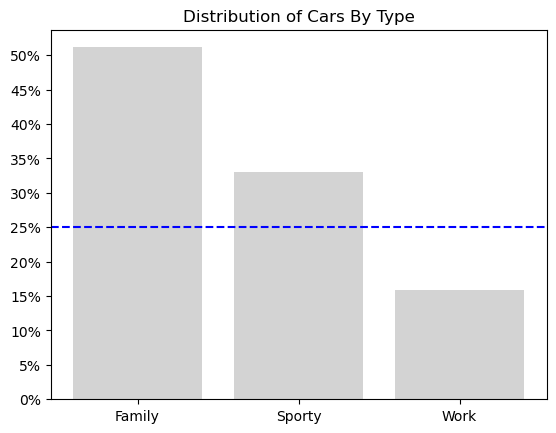

In [25]:
plt.bar(type_freq.index, type_freq.values, color='lightgrey')
plt.axhline(y=25, color='blue', linestyle='--')
y_ticks = range(0, 55, 5)
plt.yticks(y_ticks, [f'{tick}%' for tick in y_ticks])
plt.title('Distribution of Cars By Type')
plt.show()

9. The dataset productioncost.xlsx, shows the various manufacturing costs of fertilizer production for a major producer in 4 of its plants. For this exercise, we are focusuing primarily on Plant (the name of the production Plant), Production Costs (which is overall production costs), Month (the month given from 1 to 12 of production). 

In [27]:
production_cost = pd.read_excel('productioncost.xlsx')
production_cost.head()

,Date,Plant,Production,Raw Material,Sales,Raw Material Cost per pound,Operating Cost per pound,LaborCost _worker,Month,Month Name,Exchange Rate,No. of Workers,Raw Material Cost ($),Operating Cost ($),Labor Cost ($),Total Cost,Output Worker
0,2013-01-01,Mexico,45508.469,48250.0,0.00,9.536213,1.438374,633.366792,1,Jan,0.0725,45,33358.866741,4745.717982,2066.359158,40170.943882,1011.299311
1,2013-01-02,Mexico,48526.165,51460.0,0.07,9.536213,1.438374,633.366792,1,Jan,0.0725,45,35578.182021,5060.409610,2066.359158,42704.950789,1078.359222
2,2013-01-03,Mexico,47136.297,49760.0,0.07,9.536213,1.438374,633.366792,1,Jan,0.0725,45,34402.843711,4915.471278,2066.359158,41384.674147,1047.473267
3,2013-01-04,Mexico,48495.783,51310.0,0.00,9.536213,1.438374,633.366792,1,Jan,0.0725,45,35474.475699,5057.241311,2066.359158,42598.076169,1077.684067
4,2013-01-05,Mexico,45360.287,47580.0,0.07,9.536213,1.438374,633.366792,1,Jan,0.0725,45,32895.645172,4730.265255,2066.359158,39692.269585,1008.006378


a. (4 points) Generate a Treemap for Total Production costs by Plants. Your graph should look as be shown below

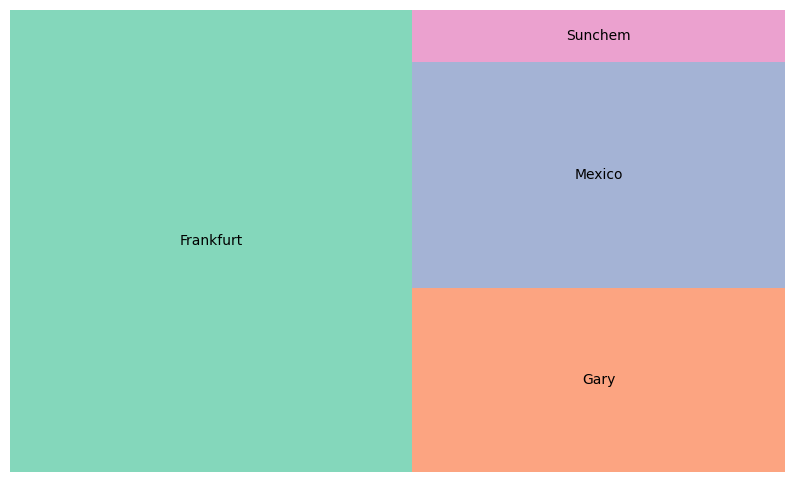

In [31]:
import squarify

total_costs_by_plant = production_cost.groupby('Plant')['Production'].sum().reset_index()

sizes = total_costs_by_plant['Production']
labels = total_costs_by_plant['Plant']
colors = ['mediumaquamarine', '#fc8e62', '#8ea0cb', '#e78ac3']

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, norm_x=250, norm_y=200)
plt.axis('off')
plt.show()

b. (4 points) Generate a pie chart to show Total Production Costs by Plant, 'exploding' out Sumchem's segment. Use 'darkkhaki','hotpink','mediumblue','springgreen'in your color palette, and show values to 1 decimal place. Your pie-chart should look as shown below:

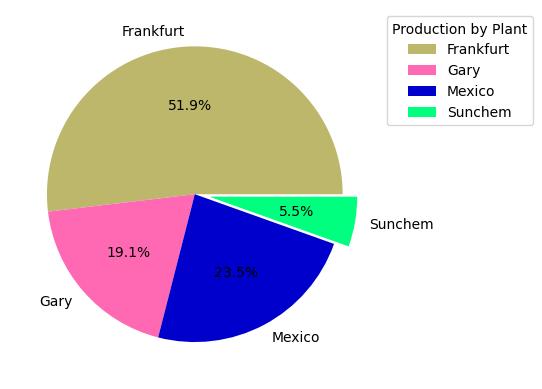

In [33]:
sizes = total_costs_by_plant['Production']
labels = total_costs_by_plant['Plant']
colors = ['darkkhaki', 'hotpink', 'mediumblue', 'springgreen']
explode = (0, 0, 0, 0.1)

plt.pie(sizes, labels =labels, autopct = '%.1f%%', colors = colors, explode = explode)
plt.legend(title = 'Production by Plant', loc = 'upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

   c. (6 points) Generate a box-plot to show the overall Labor cost. Use the dark-background palette, and set the whiskers to the 5th and 95 percentile, and exclude outliers


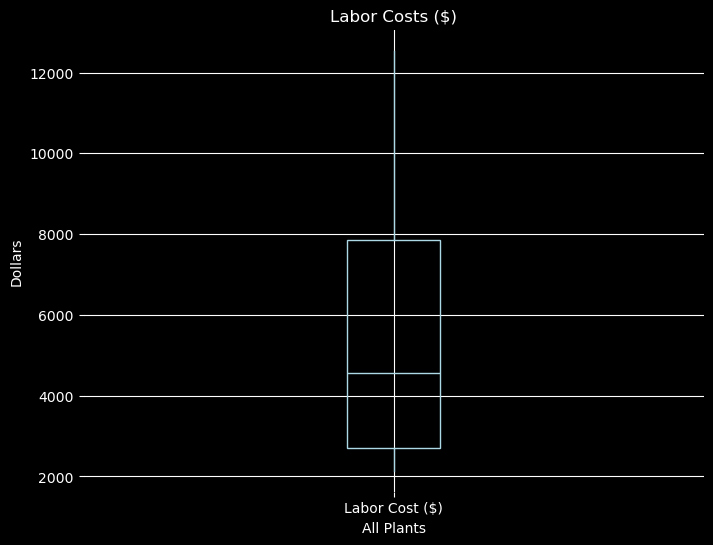

In [35]:
labor_costs = production_cost['Labor Cost ($)']

plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
box = plt.boxplot(labor_costs, whis = [5, 95], showfliers = False, patch_artist=True)
plt.grid(True, linestyle = '-', color = 'white')
plt.title('Labor Costs ($)')
plt.ylabel('Dollars')
plt.xlabel('All Plants')
for element in ['boxes', 'whiskers', 'medians']:
    plt.setp(box[element], color = 'lightblue')
plt.setp(box['boxes'], facecolor = 'none')
plt.setp(box['caps'], visible=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xticks([1], ['Labor Cost ($)'], color='white')
plt.show()

Based on the boxplot, which of the followign are True

 i. 50% of labor costs are approximately between 2.5K and 7.9K: True. The interquartile range (IQR) is from Q1 to Q3.
 
 ii. 75% of labor costs are higher than $2.5K: True. The lower quartile Q1, meaning 75% of the data is above this value.
 
 iii. 25% of labor costs are higher than $7.9K: True. The upper quartile Q3, meaning 25% of the data is above this value.
 
 iv. the distribution of production costs is skewed left: False. The median is closer to Q1 than Q3, suggesting a right skew.
 
 v. 50% of labor costs are below $4.3K: True. The median, meaning 50% of the data is below this value.
 

d. (4 points) Generate pie-charts to show the Total Production costs for each plant for months 1,4,7 and 10. Your chart titles should show the corresponding months of January, April,July and October, respectively, with values shown in percentages to 1 decimal place. Use 'hotpink', drakkhaki','blue and 'springgreen' for the colors. Your graphs should be look as shown below:

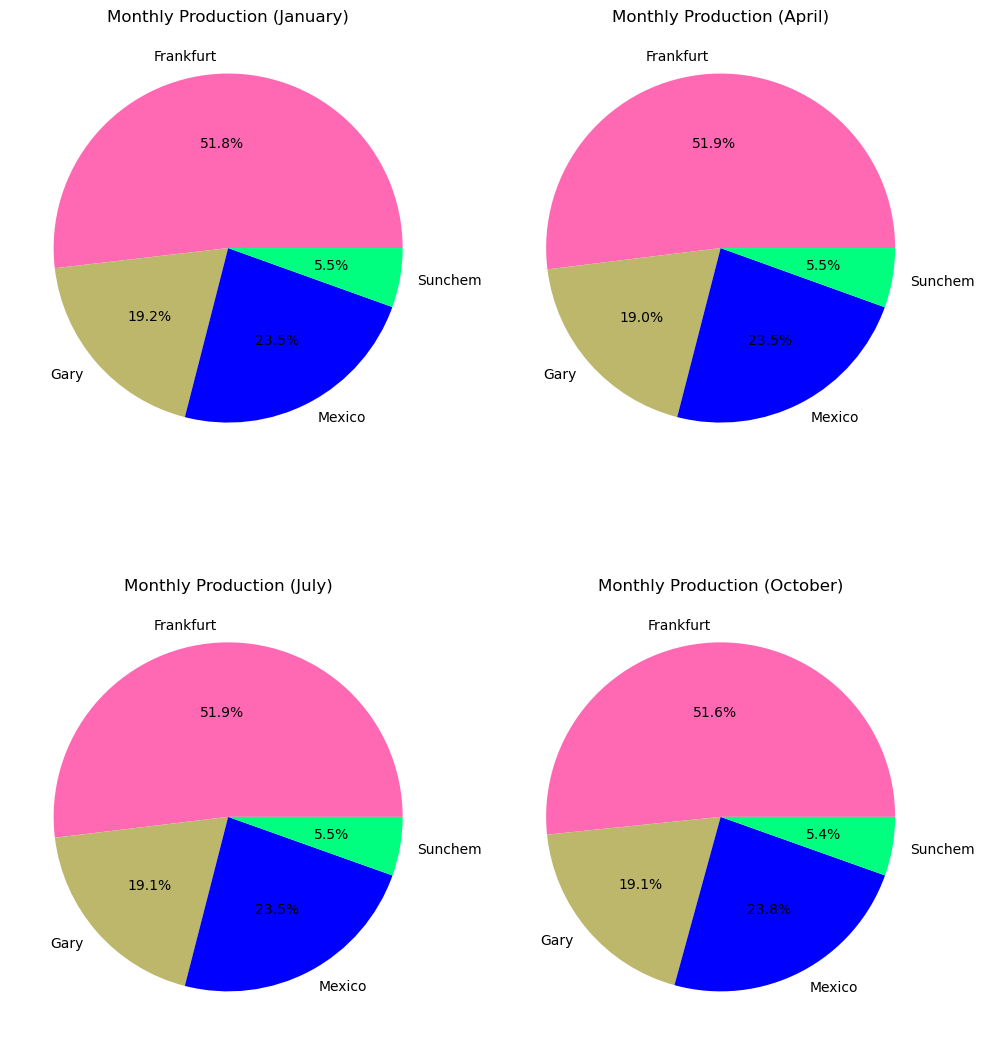

In [51]:
colors = ['hotpink', 'darkkhaki', 'blue', 'springgreen']
plt.style.use('default')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))

# January
monthly_data_jan = production_cost[production_cost['Month'] == 1].groupby('Plant')['Production'].sum()
ax1.pie(monthly_data_jan, labels=monthly_data_jan.index, autopct='%.1f%%', colors=colors)
ax1.set_title(f'Monthly Production (January)')

# April
monthly_data_apr = production_cost[production_cost['Month'] == 4].groupby('Plant')['Production'].sum()
ax2.pie(monthly_data_apr, labels=monthly_data_apr.index, autopct='%.1f%%', colors=colors)
ax2.set_title(f'Monthly Production (April)')

# July
monthly_data_jul = production_cost[production_cost['Month'] == 7].groupby('Plant')['Production'].sum()
ax3.pie(monthly_data_jul, labels=monthly_data_jul.index, autopct='%.1f%%', colors=colors)
ax3.set_title(f'Monthly Production (July)')

# October
monthly_data_oct = production_cost[production_cost['Month'] == 10].groupby('Plant')['Production'].sum()
ax4.pie(monthly_data_oct, labels=monthly_data_oct.index, autopct='%.1f%%', colors=colors)
ax4.set_title(f'Monthly Production (October)')

plt.tight_layout()
plt.show()